In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/german-credit/German_credit.xlsx


一、导入库

In [43]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

二、导入数据，并将目标列转为int32类型

In [3]:
xlsx_data = pd.read_excel('/kaggle/input/german-credit/German_credit.xlsx')
train = pd.DataFrame(xlsx_data)
train['target'] = train['target'].astype('int32')

三、查看数据

In [5]:
train.head()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,...,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,target
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,1,1,1,0
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,2,1,1,0
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,1,1,1,0
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,2,1,2,0
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,1,1,2,0


In [6]:
train.shape

(1000, 21)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Account Balance                    1000 non-null   int64
 1   Duration of Credit (month)         1000 non-null   int64
 2   Payment Status of Previous Credit  1000 non-null   int64
 3   Purpose                            1000 non-null   int64
 4   Credit Amount                      1000 non-null   int64
 5   Value Savings/Stocks               1000 non-null   int64
 6   Length of current employment       1000 non-null   int64
 7   Instalment per cent                1000 non-null   int64
 8   Sex & Marital Status               1000 non-null   int64
 9   Guarantors                         1000 non-null   int64
 10  Duration in Current address        1000 non-null   int64
 11  Most valuable available asset      1000 non-null   int64
 12  Age (years)          

In [10]:
train.dtypes

Account Balance                      int64
Duration of Credit (month)           int64
Payment Status of Previous Credit    int64
Purpose                              int64
Credit Amount                        int64
Value Savings/Stocks                 int64
Length of current employment         int64
Instalment per cent                  int64
Sex & Marital Status                 int64
Guarantors                           int64
Duration in Current address          int64
Most valuable available asset        int64
Age (years)                          int64
Concurrent Credits                   int64
Type of apartment                    int64
No of Credits at this Bank           int64
Occupation                           int64
No of dependents                     int64
Telephone                            int64
Foreign Worker                       int64
target                               int32
dtype: object

五、数据清洗

1. 去除重复值

In [11]:
#检查重复值
train.duplicated().sum()

0

检查得到数据集中没有重复值的出现，无需进行重复值处理

2. 去除缺失值

In [13]:
#在特征describe中加入缺失率
train.describe().T.assign(missing_rate = train.apply(lambda x : (len(x) - x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_rate
Account Balance,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0,0.0
Duration of Credit (month),1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0,0.0
Payment Status of Previous Credit,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0,0.0
Purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0,0.0
Credit Amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0,0.0
Value Savings/Stocks,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0,0.0
Length of current employment,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0,0.0
Instalment per cent,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0,0.0
Sex & Marital Status,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0,0.0
Guarantors,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0,0.0


由missing_rate列，可以看出所有特征均无缺失值

3. 检查所有特征是否存在异常值

<Axes: >

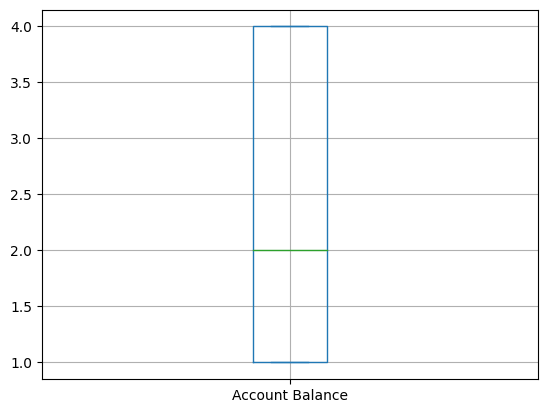

In [17]:
train['Account Balance'].plot(kind="box", grid=True)

<Axes: >

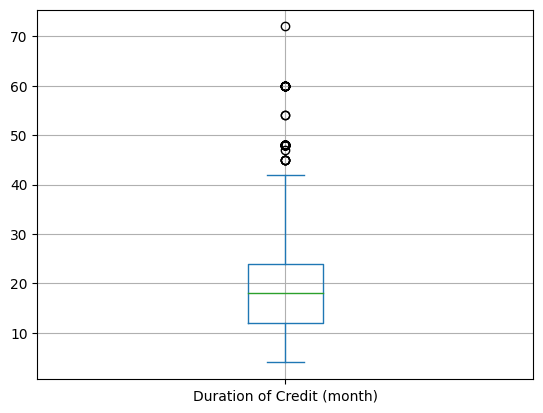

In [18]:
train['Duration of Credit (month)'].plot(kind="box", grid=True)

<Axes: >

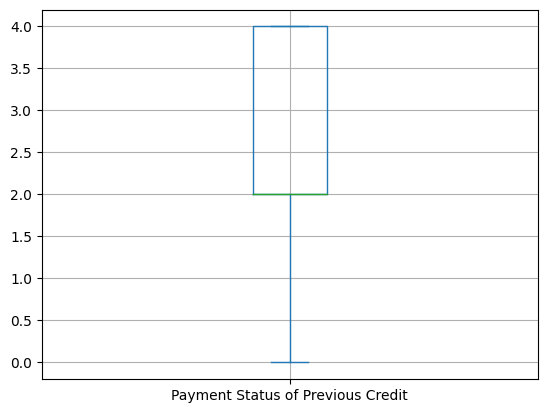

In [19]:
train['Payment Status of Previous Credit'].plot(kind="box", grid=True)

<Axes: >

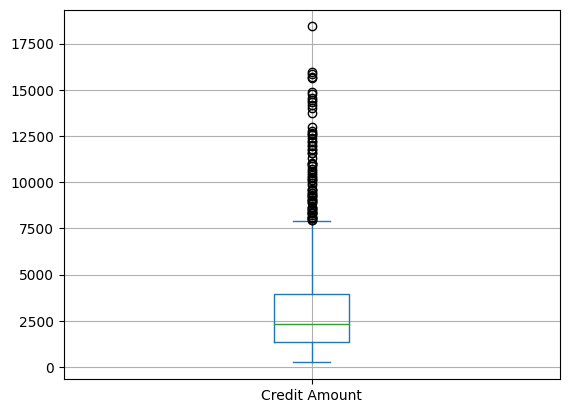

In [20]:
train['Credit Amount'].plot(kind="box", grid=True)

<Axes: >

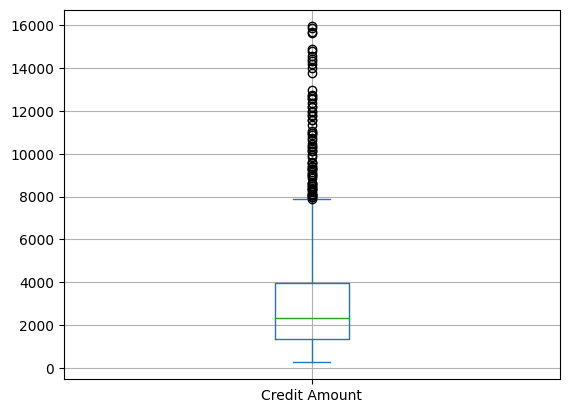

In [21]:
med = train['Credit Amount'].median()
New = []
for val in train['Credit Amount']:
    if val > 17500:
        New.append(med)
    else:
        New.append(val)
train['Credit Amount'] = New
train['Credit Amount'].plot(kind="box", grid=True)

对credit amount中存在的偏差较大的异常值进行中位数替代处理

<Axes: >

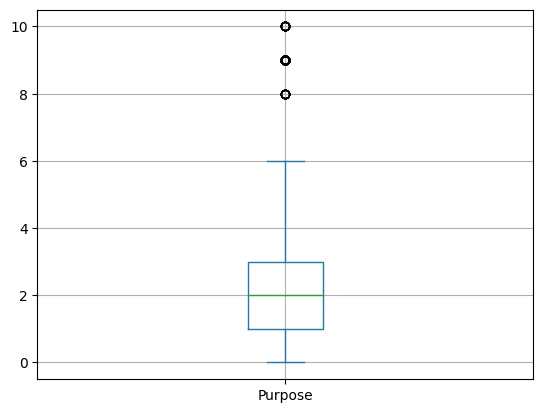

In [22]:
train['Purpose'].plot(kind="box", grid=True)

<Axes: >

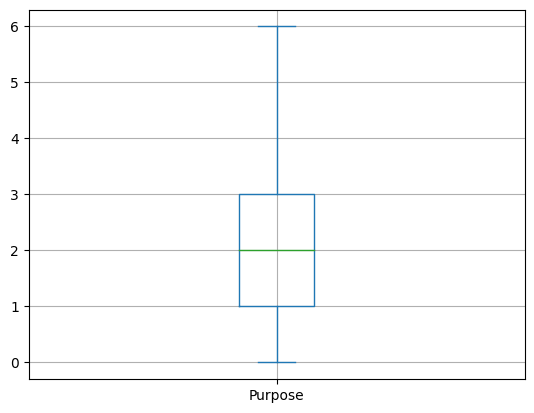

In [23]:
med = train['Purpose'].median()
New = []
for val in train['Purpose']:
    if val > 7:
        New.append(med)
    else:
        New.append(val)
train['Purpose'] = New
train['Purpose'].plot(kind="box", grid=True)

对Purpose中存在的偏差较大的异常值进行中位数替代处理

<Axes: >

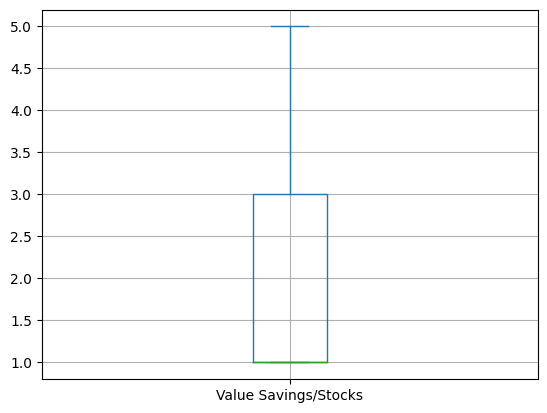

In [24]:
train['Value Savings/Stocks'].plot(kind="box", grid=True)

<Axes: >

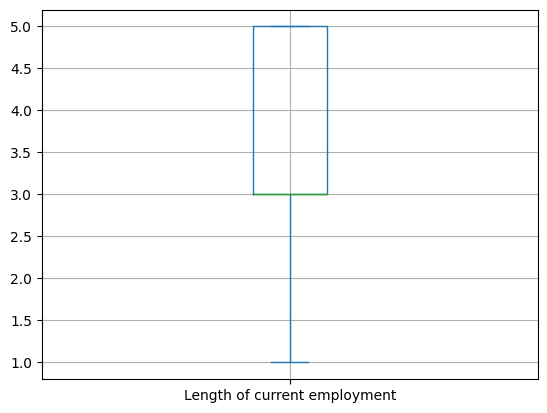

In [25]:
train['Length of current employment'].plot(kind="box", grid=True)

<Axes: >

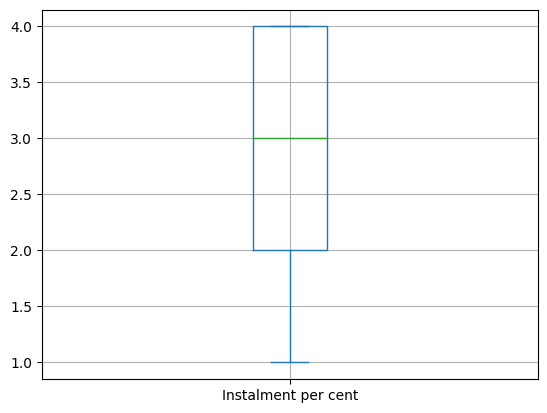

In [26]:
train['Instalment per cent'].plot(kind="box", grid=True)

<Axes: >

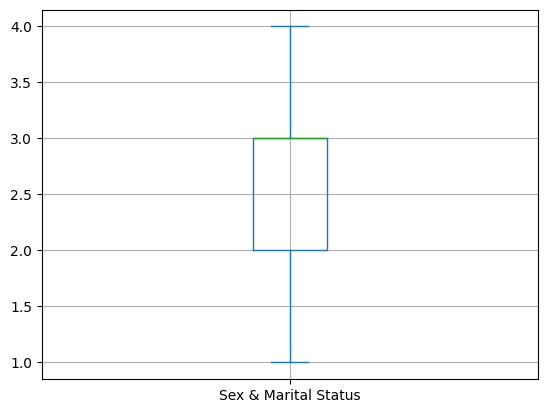

In [27]:
train['Sex & Marital Status'].plot(kind="box", grid=True)

<Axes: >

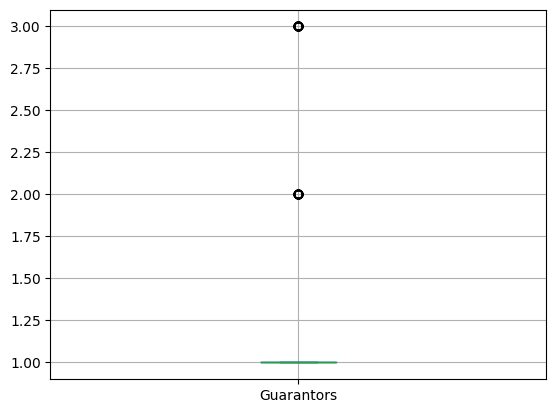

In [28]:
train['Guarantors'].plot(kind="box", grid=True)

<Axes: >

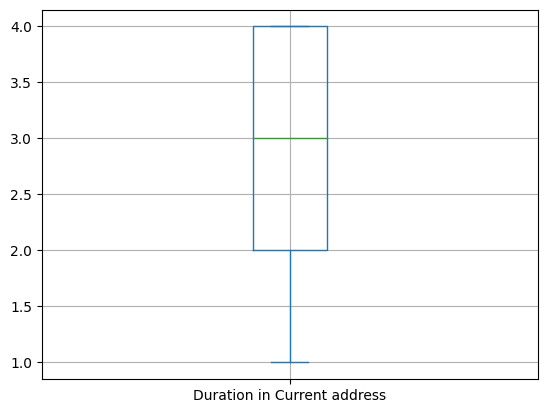

In [29]:
train['Duration in Current address'].plot(kind="box", grid=True)

<Axes: >

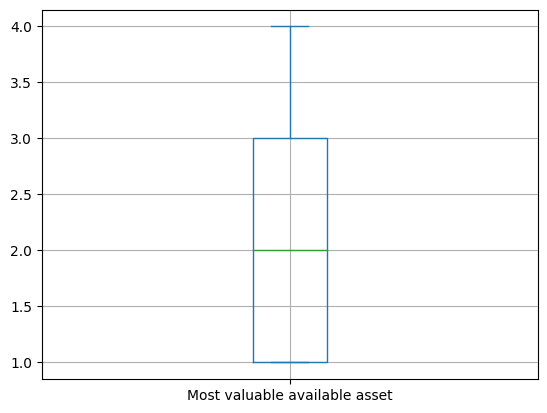

In [30]:
train['Most valuable available asset'].plot(kind="box", grid=True)

<Axes: >

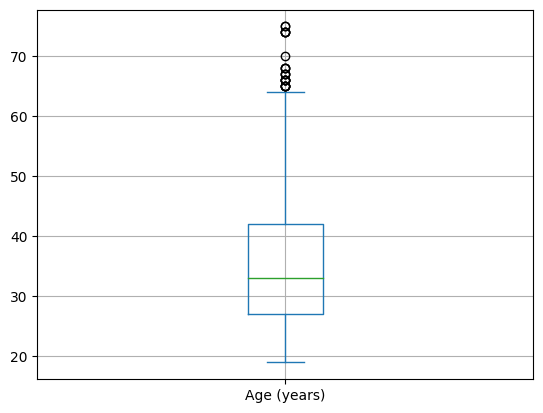

In [31]:
train['Age (years)'].plot(kind="box", grid=True)

<Axes: >

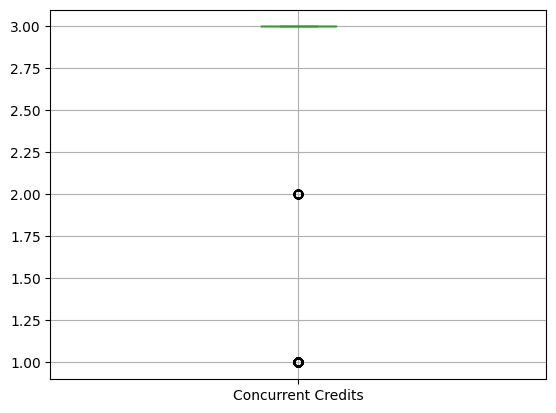

In [32]:
train['Concurrent Credits'].plot(kind="box", grid=True)

<Axes: >

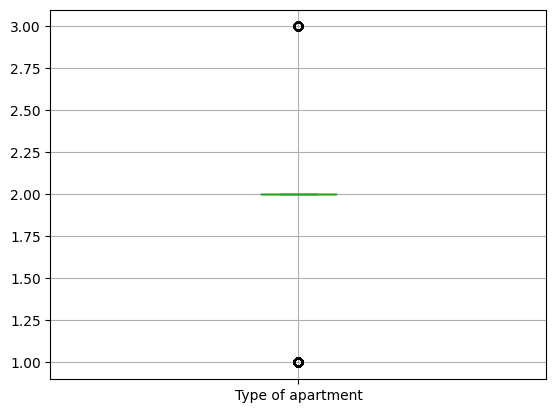

In [33]:
train['Type of apartment'].plot(kind="box", grid=True)

<Axes: >

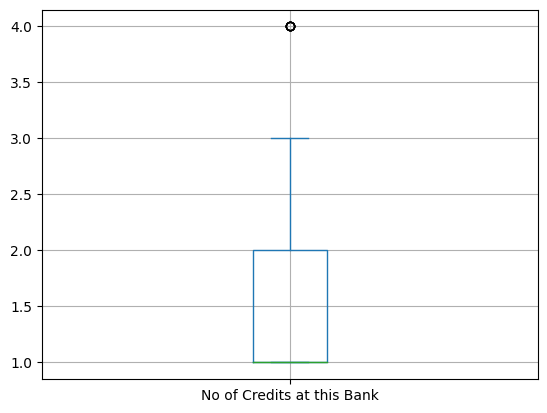

In [35]:
train['No of Credits at this Bank'].plot(kind="box", grid=True)

<Axes: >

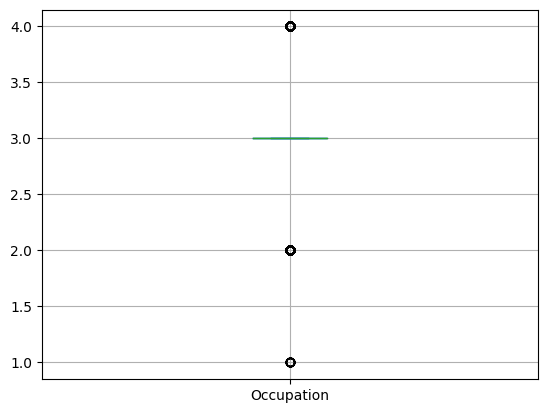

In [36]:
train['Occupation'].plot(kind="box", grid=True)

<Axes: >

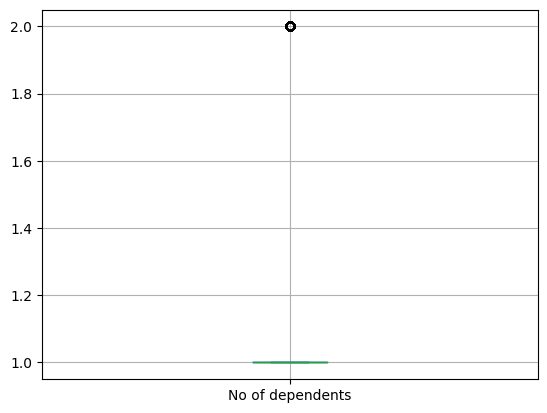

In [37]:
train['No of dependents'].plot(kind="box", grid=True)

<Axes: >

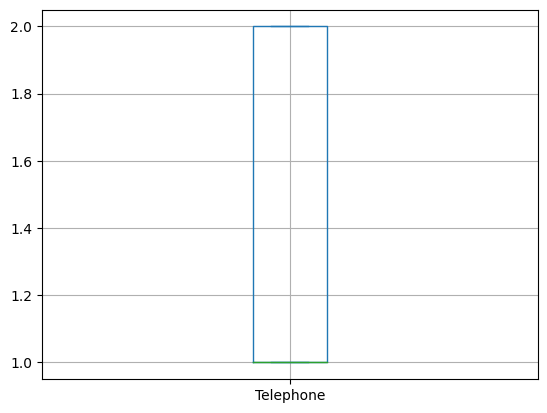

In [34]:
train['Telephone'].plot(kind="box", grid=True)

<Axes: >

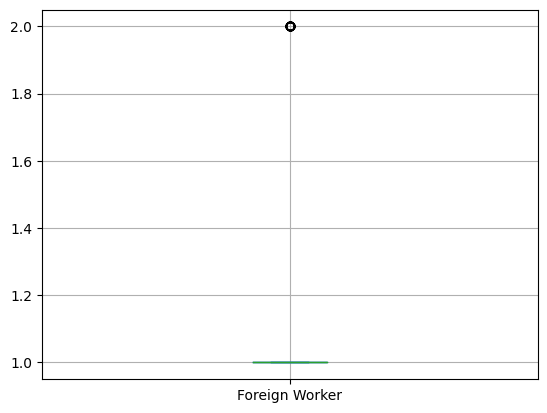

In [38]:
train['Foreign Worker'].plot(kind="box", grid=True)

六、数据可视化

In [40]:
#首先切分数据，并保存train，test数据为csv文件
from sklearn.model_selection import train_test_split
Y = train['target']
X = train.iloc[:,:20]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)
train = pd.concat([y_train, X_train], axis=1)
test = pd.concat([y_test, X_test], axis=1)

train.to_csv('TrainData.csv', index=False)
test.to_csv('TestData.csv', index=False)

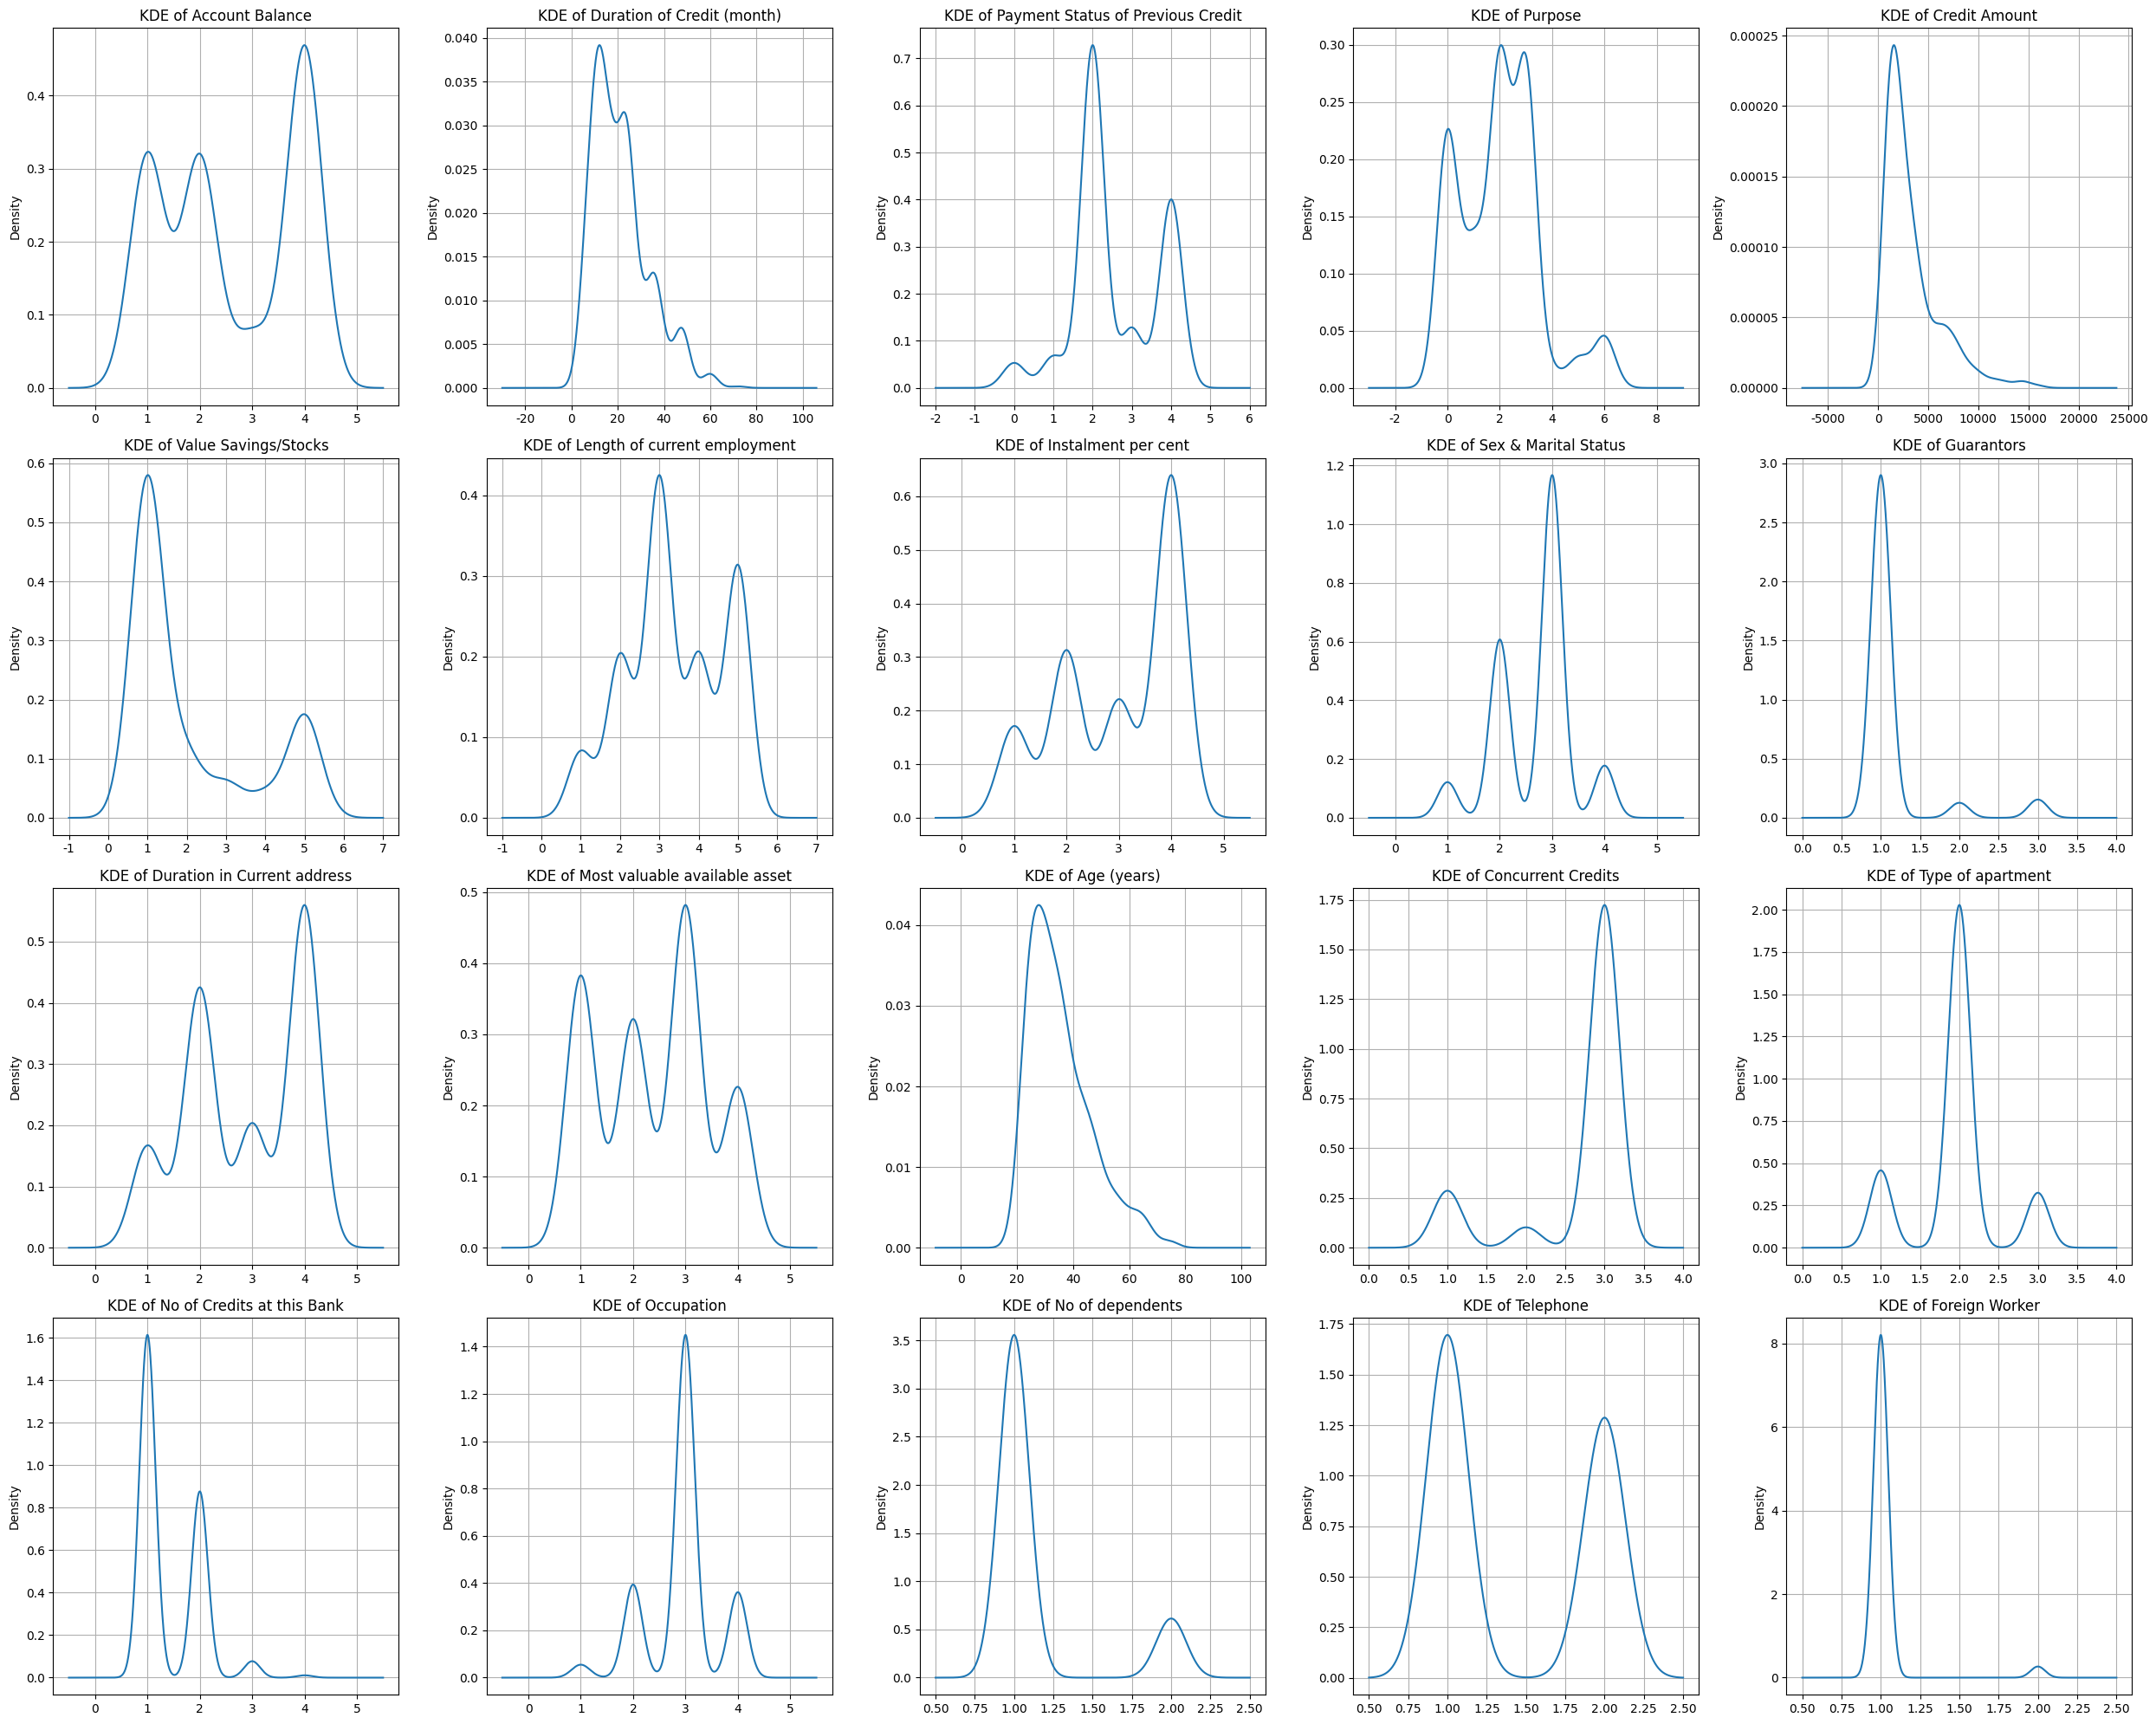

In [44]:
# 下面利用直方图和核密度估计画图
fig = plt.figure(figsize=(25, 20))
fig.set(alpha=0.2)

plt.subplot2grid((4, 5), (0, 0))
train["Account Balance"].plot(kind="kde", grid=True)
plt.title("KDE of Account Balance")

plt.subplot2grid((4, 5), (0, 1))
train["Duration of Credit (month)"].plot(kind="kde", grid=True)
plt.title("KDE of Duration of Credit (month)")

plt.subplot2grid((4, 5), (0, 2))
train["Payment Status of Previous Credit"].plot(kind="kde", grid=True)
plt.title("KDE of Payment Status of Previous Credit")

plt.subplot2grid((4, 5), (0, 3))
train["Purpose"].plot(kind="kde", grid=True)
plt.title("KDE of Purpose")

plt.subplot2grid((4, 5), (0, 4))
train["Credit Amount"].plot(kind="kde", grid=True)
plt.title("KDE of Credit Amount")

plt.subplot2grid((4, 5), (1, 0))
train["Value Savings/Stocks"].plot(kind="kde", grid=True)
plt.title("KDE of Value Savings/Stocks")

plt.subplot2grid((4, 5), (1, 1))
train["Length of current employment"].plot(kind="kde", grid=True)
plt.title("KDE of Length of current employment")

plt.subplot2grid((4, 5), (1, 2))
train["Instalment per cent"].plot(kind="kde", grid=True)
plt.title("KDE of Instalment per cent")

plt.subplot2grid((4, 5), (1, 3))
train["Sex & Marital Status"].plot(kind="kde", grid=True)
plt.title("KDE of Sex & Marital Status")

plt.subplot2grid((4, 5), (1, 4))
train["Guarantors"].plot(kind="kde", grid=True)
plt.title("KDE of Guarantors")


plt.subplot2grid((4, 5), (2, 0))
train["Duration in Current address"].plot(kind="kde", grid=True)
plt.title("KDE of Duration in Current address")

plt.subplot2grid((4, 5), (2, 1))
train["Most valuable available asset"].plot(kind="kde", grid=True)
plt.title("KDE of Most valuable available asset")

plt.subplot2grid((4, 5), (2, 2))
train["Age (years)"].plot(kind="kde", grid=True)
plt.title("KDE of Age (years)")

plt.subplot2grid((4, 5), (2, 3))
train["Concurrent Credits"].plot(kind="kde",grid=True)
plt.title("KDE of Concurrent Credits")

plt.subplot2grid((4, 5), (2, 4))
train["Type of apartment"].plot(kind="kde", grid=True)
plt.title("KDE of Type of apartment")

plt.subplot2grid((4, 5), (3, 0))
train["No of Credits at this Bank"].plot(kind="kde", grid=True)
plt.title("KDE of No of Credits at this Bank")

plt.subplot2grid((4, 5), (3, 1))
train["Occupation"].plot(kind="kde", grid=True)
plt.title("KDE of Occupation")

plt.subplot2grid((4, 5), (3, 2))
train["No of dependents"].plot(kind="kde", grid=True)
plt.title("KDE of No of dependents")

plt.subplot2grid((4, 5), (3, 3))
train["Telephone"].plot(kind="kde", grid=True)
plt.title("KDE of Telephone")

plt.subplot2grid((4, 5), (3, 4))
train["Foreign Worker"].plot(kind="kde", grid=True)
plt.title("KDE of Foreign Worker")

# 解决中文的显示问题
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

plt.tight_layout() # 调整子图之间的间距，紧凑显示图像
plt.show()

由以上图可以很好的分别出连续值特征和离散值的特征，其中只有Duration of Credit Amount(months)、credit Amount、Age(years)为连续值特征，其余特征均为离散型特征

七、对特征进行分箱处理

首先自定义对连续值的分箱处理，并计算特征的iv值，woe值，和cut分箱数组

In [46]:
import scipy.stats.stats as stats

def mono_bin(Y, X, n=20):
    r = 0
    good = Y.sum()
    bad = Y.count() - good 
    
    while np.abs(r) < 1:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X.rank(method="first"), n)}) # X.rank(method="first")
        d2 = d1.groupby("Bucket", as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y) # 使用斯皮尔曼等级相关系数来评估两个变量之间的相关性
        n = n - 1
    
    d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
    d3['min']=d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1-d3['rate'])) / (good/bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min'))
    print(d4)
    cut=[]
    cut.append(float('-inf'))
    for i in range(1, n+1):
        qua = X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe = list(d4['woe'].round(3))
    return d4, iv, cut, woe

再定义对离散值的分箱处理，传入自定义cut分箱数组，并计算特征的iv值，woe值

In [47]:
# 自定义分箱函数
def self_bin(Y, X, cat):
    good = Y.sum()
    bad = Y.count() - good
    d1 = pd.DataFrame({'X': X, 'Y': Y,'Bucket': pd.cut(X, cat)})
    d2 = d1.groupby('Bucket', as_index = True)
    d3 = pd.DataFrame(d2.X.min(), columns=['min'])
    d3['min'] = d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1 - d3['rate'])) / (good / bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min'))
    print(d4)
    woe = list(d4['woe'].round(3))
    return d4, iv, woe

对所有特征进行分箱处理，并得到相应的iv值和woe值

In [48]:
pinf = float('inf') # 正无穷大
ninf = float('-inf') # 负无穷大
cutx1 = [ninf, 1, 2, 3, pinf]
dfx1, ivx1, woex1 = self_bin(train.target, train["Account Balance"], cutx1)
dfx2, ivx2, cutx2, woex2 = mono_bin(train.target, train['Duration of Credit (month)'], n=10)
cutx3 = [ninf, 0, 2, 3, pinf]
dfx3, ivx3, woex3 = self_bin(train.target, train["Payment Status of Previous Credit"], cutx3)
cutx4 = [ninf, 0, 2, 4, pinf]
dfx4, ivx4, woex4 = self_bin(train.target, train["Purpose"], cutx4)
dfx5, ivx5, cutx5, woex5 = mono_bin(train.target, train['Credit Amount'], n=10)
cutx6 = [ninf, 1, 2,pinf]
dfx6, ivx6, woex6 = self_bin(train.target, train["Value Savings/Stocks"], cutx6)
cutx7 = [ninf, 2, 3, 4,pinf]
dfx7, ivx7, woex7 = self_bin(train.target, train["Length of current employment"], cutx7)
cutx8 = [ninf, 1, 2, pinf]
dfx8, ivx8, woex8 = self_bin(train.target, train["Instalment per cent"], cutx8)
cutx9 = [ninf, 1, 2, 3, pinf]
dfx9, ivx9, woex9 = self_bin(train.target, train["Sex & Marital Status"], cutx9)
cutx10 = [ninf, 1, 2, pinf]
dfx10, ivx10, woex10 = self_bin(train.target, train["Guarantors"], cutx10)
cutx11 = [ninf, 1, 2, 3, pinf]
dfx11, ivx11, woex11 = self_bin(train.target, train["Duration in Current address"], cutx11)
cutx12 = [ninf, 1, 2, 3, pinf]
dfx12, ivx12, woex12 = self_bin(train.target, train["Most valuable available asset"], cutx12)
dfx13, ivx13, cutx13, woex13 = mono_bin(train.target, train['Age (years)'], n=10)
cutx14 = [ninf, 1, 2, pinf]
dfx14, ivx14, woex14 = self_bin(train.target, train["Concurrent Credits"], cutx14)
cutx15 = [ninf,1, 2, pinf]
dfx15, ivx15, woex15 = self_bin(train.target, train["Type of apartment"], cutx15)
cutx16 = [ninf,1, 2, pinf]
dfx16, ivx16, woex16 = self_bin(train.target, train["No of Credits at this Bank"], cutx16)
cutx17 = [ninf,1, 2, 3,pinf]
dfx17, ivx17, woex17 = self_bin(train.target, train["Occupation"], cutx17)
cutx18 = [ninf,1,pinf]
dfx18, ivx18, woex18 = self_bin(train.target, train["No of dependents"], cutx18)
cutx19 = [ninf,1, pinf]
dfx19, ivx19, woex19 = self_bin(train.target, train["Telephone"], cutx19)
cutx20 = [ninf,1, pinf]
dfx20, ivx20, woex20 = self_bin(train.target, train["Foreign Worker"], cutx20)

/tmp/ipykernel_33/3233258545.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index = True)
/tmp/ipykernel_33/1858862244.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby("Bucket", as_index = True)
/tmp/ipykernel_33/1858862244.py:11: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  r, p = stats.spearmanr(d2.mean().X, d2.mean().Y) # 使用斯皮尔曼等级相关系数来评估两个变量之间的相关性
/tmp/ipykernel_33/1858862244.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in 

             min  max  sum  total      rate       woe  goodattribute  \
Bucket                                                                 
(-inf, 1.0]    1    1   93    190  0.489474  0.818829       0.447115   
(1.0, 2.0]     2    2   72    188  0.382979  0.384017       0.346154   
(2.0, 3.0]     3    3    9     43  0.209302 -0.468195       0.043269   
(3.0, inf]     4    4   34    279  0.121864 -1.113957       0.163462   

             badattribute  
Bucket                     
(-inf, 1.0]      0.197154  
(1.0, 2.0]       0.235772  
(2.0, 3.0]       0.069106  
(3.0, inf]       0.497967  
                min  max  sum  total      rate       woe  goodattribute  \
Bucket                                                                    
(0.999, 234.0]    4   12   51    233  0.218884 -0.411240       0.245192   
(234.0, 467.0]   12   24   62    233  0.266094 -0.153589       0.298077   
(467.0, 700.0]   24   72   95    234  0.405983  0.480344       0.456731   

                badattr

/tmp/ipykernel_33/3233258545.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index = True)
/tmp/ipykernel_33/3233258545.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index = True)
/tmp/ipykernel_33/3233258545.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index = True)
/tmp/ipykernel_33/3233258545.py:6: FutureWarning: Th

             min  max  sum  total      rate       woe  goodattribute  \
Bucket                                                                 
(-inf, 2.0]    1    2   63    162  0.388889  0.408956       0.302885   
(2.0, 3.0]     3    3   73    243  0.300412  0.015602       0.350962   
(3.0, 4.0]     4    4   29    115  0.252174 -0.226111       0.139423   
(4.0, inf]     5    5   43    180  0.238889 -0.297840       0.206731   

             badattribute  
Bucket                     
(-inf, 2.0]      0.201220  
(2.0, 3.0]       0.345528  
(3.0, 4.0]       0.174797  
(4.0, inf]       0.278455  
             min  max  sum  total      rate       woe  goodattribute  \
Bucket                                                                 
(-inf, 1.0]    1    1   22     89  0.247191 -0.252710       0.105769   
(1.0, 2.0]     2    2   41    163  0.251534 -0.229508       0.197115   
(2.0, inf]     3    4  145    448  0.323661  0.123942       0.697115   

             badattribute  
Bucket    

/tmp/ipykernel_33/3233258545.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index = True)
/tmp/ipykernel_33/3233258545.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index = True)
/tmp/ipykernel_33/3233258545.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index = True)


计算各变量的相关性系数矩阵，并绘制出相应的热力图

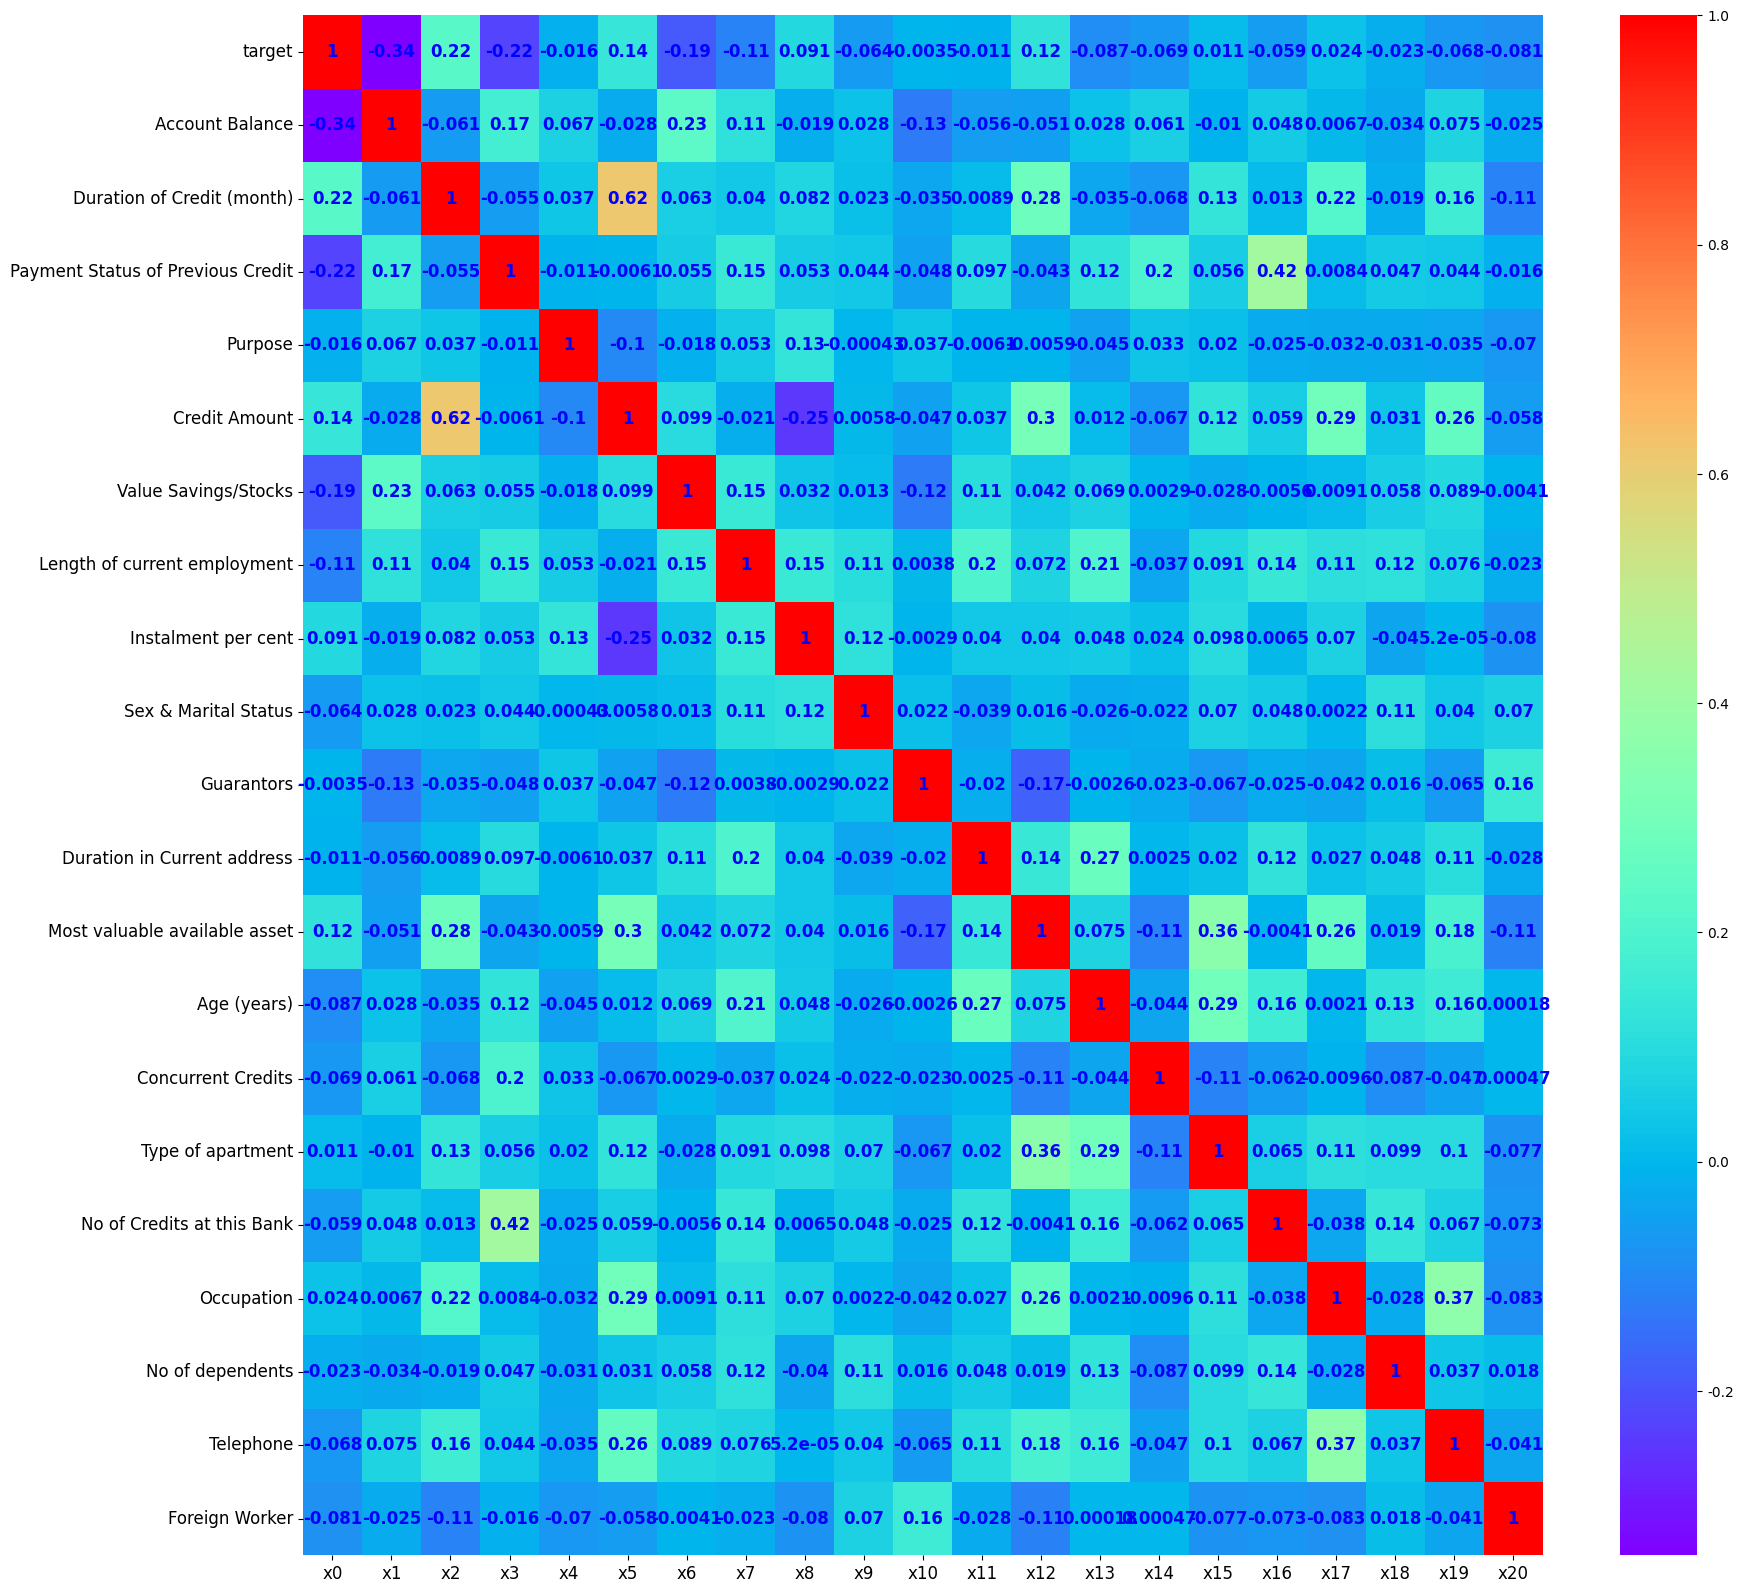

In [50]:
import seaborn as sns
corr = train.corr() # 计算各变量的相关性系数
xticks = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10', 'x11','x12','x13','x14','x15','x16','x17','x18','x19','x20'] # x轴标签
yticks = list(corr.index) # y轴标签
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap='rainbow', ax=ax,
            annot_kws={'size': 12, 'weight': 'bold', 'color': 'blue'}) # 绘制相关性系数热力图
ax.set_xticklabels(xticks, rotation=0, fontsize=12)
ax.set_yticklabels(yticks, rotation=0, fontsize=12)
plt.show()

由上图可以得到，特征之间的相关性并不强，没有强相关性特征，没有可以删除的特征

展示各个变量的iv值

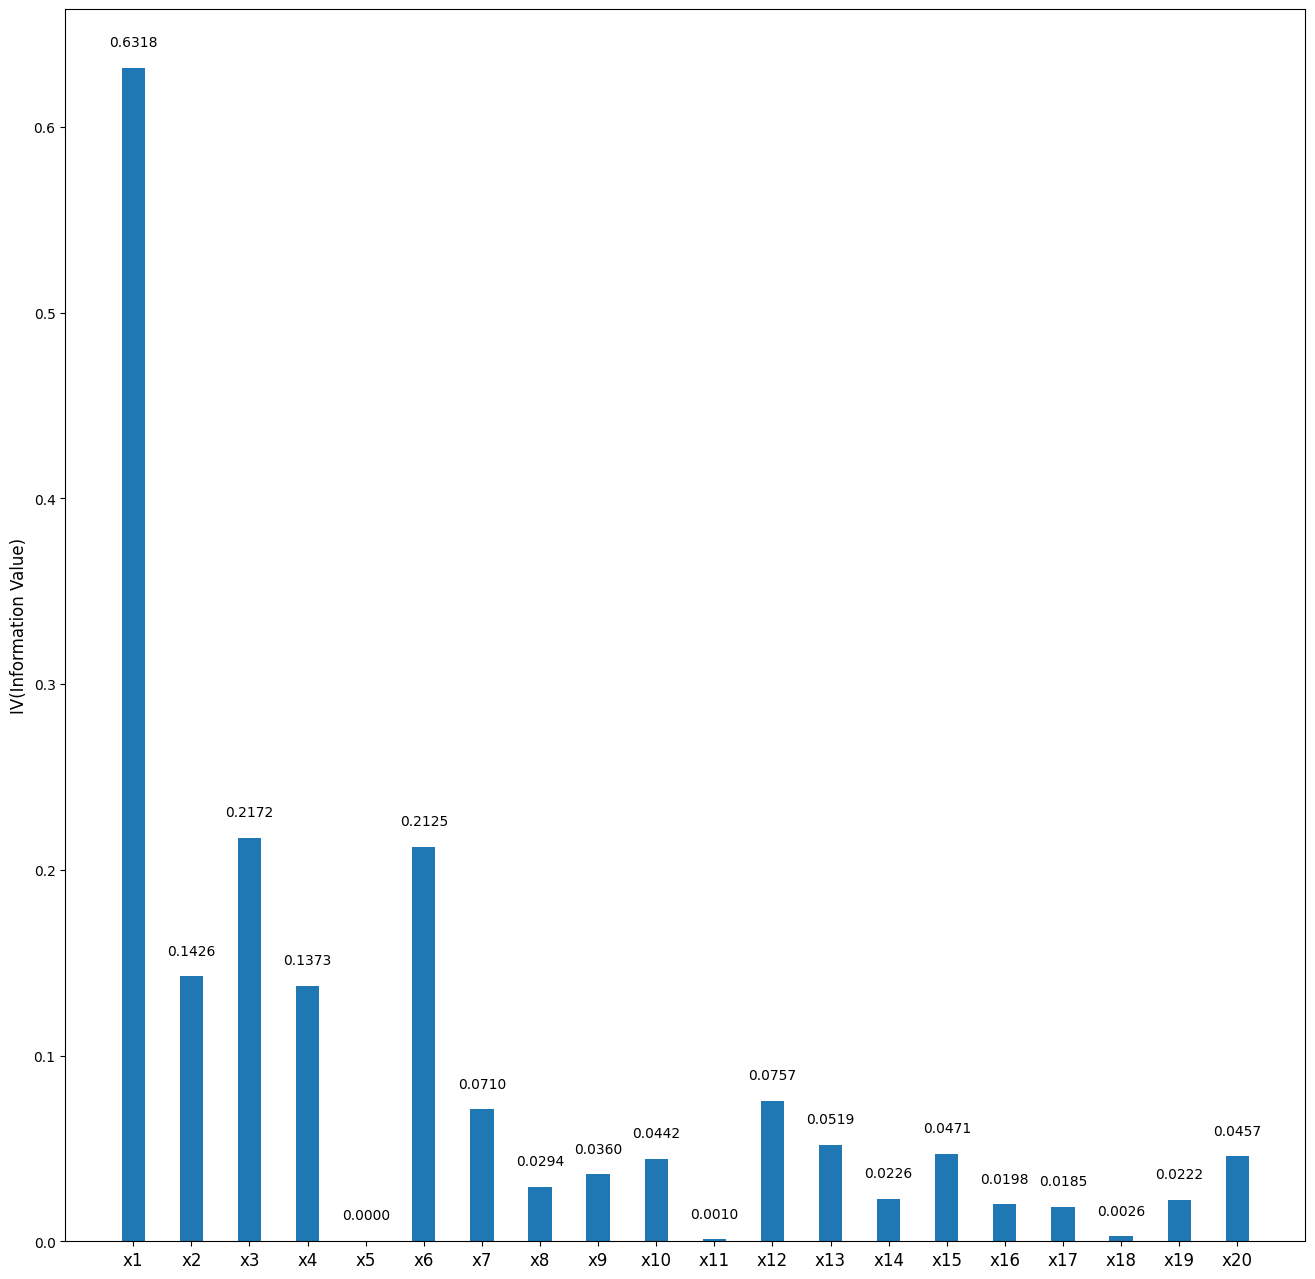

In [51]:
ivlist = [ivx1, ivx2, ivx3, ivx4, ivx5, ivx6, ivx7, ivx8, ivx9, ivx10, ivx11, ivx12, ivx13, ivx14, ivx15, ivx16,ivx17, ivx18, ivx19, ivx20] # 各变量IV
index = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20'] # x轴的标签
fig1 = plt.figure(figsize=(16, 16))
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index)) + 1
ax1.bar(x, ivlist, width=0.4) # 生成柱状图
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=0, fontsize=12)
ax1.set_ylabel('IV(Information Value)', fontsize=12)
# 在柱状图上添加数字标签
for a, b in zip(x, ivlist):
    plt.text(a, b + 0.01, '%.4f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

通过IV值判断变量预测能力的标准是：

< 0.02: unpredictive

0.02 to 0.1: weak

0.1 to 0.3: medium

0.3 to 0.5: strong

0.5: suspicious

由图可知，Credit Amount、Duration in current address、No of credits at this bank、 Occupation和No of dependents 变量的IV值明显较低，可以将这些特征删除，其中Account Balance，Payment Status of previous credit, value stocking在最后决策时所起的作用最大

定义woe函数，将特征值转换为woe值

In [52]:
# woe函数
def replace_woe(series, cut, woe):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut)-2
        m = len(cut)-2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(woe[m])
        i += 1
    return list

将训练集特征值转换为woe值，并保存为csv文件

In [53]:
from pandas import Series
train = pd.read_csv("./TrainData.csv")
train['Account Balance'] = Series(replace_woe(train['Account Balance'], cutx1, woex1))
train['Duration of Credit (month)'] = Series(replace_woe(train['Duration of Credit (month)'], cutx2, woex2))
train['Payment Status of Previous Credit'] = Series(replace_woe(train['Payment Status of Previous Credit'], cutx3, woex3))
train['Purpose'] = Series(replace_woe(train['Purpose'], cutx4, woex4))
train['Credit Amount'] = Series(replace_woe(train['Credit Amount'], cutx5, woex5))
train['Value Savings/Stocks'] = Series(replace_woe(train['Value Savings/Stocks'], cutx6, woex6))
train['Length of current employment'] = Series(replace_woe(train['Length of current employment'], cutx7, woex7))
train['Instalment per cent'] = Series(replace_woe(train['Instalment per cent'], cutx8, woex8))
train['Sex & Marital Status'] = Series(replace_woe(train['Sex & Marital Status'], cutx9, woex9))
train['Guarantors'] = Series(replace_woe(train['Guarantors'], cutx10, woex10))

train['Duration in Current address'] = Series(replace_woe(train['Duration in Current address'], cutx11, woex11))
train['Most valuable available asset'] = Series(replace_woe(train['Most valuable available asset'], cutx12, woex12))
train['Age (years)'] = Series(replace_woe(train['Age (years)'], cutx13, woex13))
train['Concurrent Credits'] = Series(replace_woe(train['Concurrent Credits'], cutx14, woex14))
train['Type of apartment'] = Series(replace_woe(train['Type of apartment'], cutx15, woex15))
train['No of Credits at this Bank'] = Series(replace_woe(train['No of Credits at this Bank'], cutx16, woex16))
train['Occupation'] = Series(replace_woe(train['Occupation'], cutx17, woex17))
train['No of dependents'] = Series(replace_woe(train['No of dependents'], cutx18, woex18))
train['Telephone'] = Series(replace_woe(train['Telephone'], cutx19, woex19))
train['Foreign Worker'] = Series(replace_woe(train['Foreign Worker'], cutx20, woex20))
train.to_csv('Woetrain.csv', index=False)

将训练集特征值转换为woe值，并转换为csv文件

In [54]:
test = pd.read_csv('TestData.csv')
# 替换成woe
test['Account Balance'] = Series(replace_woe(test['Account Balance'], cutx1, woex1))
test['Duration of Credit (month)'] = Series(replace_woe(test['Duration of Credit (month)'], cutx2, woex2))
test['Payment Status of Previous Credit'] = Series(replace_woe(test['Payment Status of Previous Credit'], cutx3, woex3))
test['Purpose'] = Series(replace_woe(test['Purpose'], cutx4, woex4))
test['Credit Amount'] = Series(replace_woe(test['Credit Amount'], cutx5, woex5))
test['Value Savings/Stocks'] = Series(replace_woe(test['Value Savings/Stocks'], cutx6, woex6))
test['Length of current employment'] = Series(replace_woe(test['Length of current employment'], cutx7, woex7))
test['Instalment per cent'] = Series(replace_woe(test['Instalment per cent'], cutx8, woex8))
test['Sex & Marital Status'] = Series(replace_woe(test['Sex & Marital Status'], cutx9, woex9))
test['Guarantors'] = Series(replace_woe(test['Guarantors'], cutx10, woex10))

test['Duration in Current address'] = Series(replace_woe(test['Duration in Current address'], cutx11, woex11))
test['Most valuable available asset'] = Series(replace_woe(test['Most valuable available asset'], cutx12, woex12))
test['Age (years)'] = Series(replace_woe(test['Age (years)'], cutx13, woex13))
test['Concurrent Credits'] = Series(replace_woe(test['Concurrent Credits'], cutx14, woex14))
test['Type of apartment'] = Series(replace_woe(test['Type of apartment'], cutx15, woex15))
test['No of Credits at this Bank'] = Series(replace_woe(test['No of Credits at this Bank'], cutx16, woex16))
test['Occupation'] = Series(replace_woe(test['Occupation'], cutx17, woex17))
test['No of dependents'] = Series(replace_woe(test['No of dependents'], cutx18, woex18))
test['Telephone'] = Series(replace_woe(test['Telephone'], cutx19, woex19))
test['Foreign Worker'] = Series(replace_woe(test['Foreign Worker'], cutx20, woex20))
test.to_csv('TestWoeData.csv', index=False)

以下为挑选模型训练模块

In [56]:
#首先定义两个函数
from sklearn.model_selection import cross_val_score

#该函数用来对传入的模型数组进行交叉验证得到，并得到分数的平均值和方差
def cvDictGen(functions, scr, X_train=X_train, Y_train=y_train, cv=10, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, Y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict
#该函数用来对以上函数得到得平均值和方差进行标准化处理
def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[list(cvDict.keys())[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[list(cvDict.keys())[0]][1]))]
    return cvDictNormalized

In [57]:
#挑选出五个算法分析比较，选出最优的算法
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,metric='minkowski', metric_params=None)
lrMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)
adaMod = AdaBoostClassifier(estimator=None, n_estimators=200, learning_rate=1.0)
gbMod = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0)

对以上所选取的初始模型进行交叉验证得分，并将得到的分数均值和方差进行标准化处理

In [58]:
cvD = cvDictGen(functions=[knMod, lrMod, adaMod, gbMod, rfMod], scr='roc_auc')
cvDictNormalize(cvD)

[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 3
iter   4  #CD cycles 1
iter   5  #CD cycles 4
iter   6  #CD cycles 2
iter   7  #CD cycles 1
iter   8  #CD cycles 5
iter   9  #CD cycles 2
iter  10  #CD cycles 3
iter  11  #CD cycles 1
iter  12  #CD cycles 15
iter  13  #CD cycles 12
iter  14  #CD cycles 1
iter  15  #CD cycles 13
iter  16  #CD cycles 11
iter  17  #CD cycles 13
iter  18  #CD cycles 29
iter  19  #CD cycles 1
optimization finished, #iter = 19
Objective value = 306.519084
#nonzeros/#features = 18/21
[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 2
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 2
iter   6  #CD cycles 4
iter   7  #CD cycles 1
iter   8  #CD cycles 10
iter   9  #CD cycles 4
iter  10  #CD cycles 2
iter  11  #CD cycles 2
iter  12  #CD cycles 4
iter  13  #CD cycles 4
iter  14  #CD cycles 1
iter  15  #CD cycles 5
iter  16  #CD cycles 3
iter  17  #CD cycles 3
iter  18  #CD cycles 6
iter  19  #CD cycles 1
iter  

{'KNeighborsClassifier': ['1.00', '1.00'],
 'LogisticRegression': ['1.38', '0.60'],
 'AdaBoostClassifier': ['1.30', '0.58'],
 'GradientBoostingClassifier': ['1.39', '0.69'],
 'RandomForestClassifier': ['1.30', '0.68']}

由标准后的数据可以看出，LogistiscRegression,AdaBoostClassifier,GradientBoostingClassifier三个模型的性能较好

挑选出AdaBoostClassifier,GradientBoostingClassifier两个模型，进行参数调优并进行调优后的性能对比

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
ada_param = {'n_estimators': [10,50,100,200,400],
                 'learning_rate': [0.1, 0.05]}
randomizedSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=ada_param, n_iter=5,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, y_train)
randomizedSearchAda.best_params_, randomizedSearchAda.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...............learning_rate=0.05, n_estimators=400; total time=   1.1s
[CV] END ...............learning_rate=0.05, n_estimators=400; total time=   1.1s
[CV] END ...............learning_rate=0.05, n_estimators=400; total time=   1.1s
[CV] END ...............learning_rate=0.05, n_estimators=400; total time=   1.1s
[CV] END ...............learning_rate=0.05, n_estimators=400; total time=   1.1s
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   0.3s
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   0.3s
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   0.3s
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   0.3s
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   0.3s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.5s
[CV] END ................learning_rate=0.1, n_est

({'n_estimators': 400, 'learning_rate': 0.05}, 0.7690661144618337)

In [63]:
gbParams = {'loss' : ['log_loss', 'exponential'],
            'n_estimators': [10,50,100,200,400],
            'max_depth': [1,2,3,4,5],
            'learning_rate':[0.1, 0.05]}
randomizedSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbParams, n_iter=10,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, y_train)
randomizedSearchGB.best_params_, randomizedSearchGB.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.05, loss=log_loss, max_depth=4, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.05, loss=log_loss, max_depth=4, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.05, loss=log_loss, max_depth=4, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.05, loss=log_loss, max_depth=4, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.05, loss=log_loss, max_depth=4, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END 

({'n_estimators': 100,
  'max_depth': 2,
  'loss': 'exponential',
  'learning_rate': 0.1},
 0.778984504793365)

以上面数据可得模型参数优化后，gbMod的准确率：0.778984504793365，adaMod的准确率0.7690661144618337，可得gbMod的性能较adaMod更好

以下为用逻辑回归模型建立评分机制

In [69]:
#利用统计建模库拟合一个逻辑回归模型，并得到各个特征得逻辑回归系数
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
# 导入数据
data = pd.read_csv('./Woetrain.csv')
#应变量
Y = data['target']
#自变量，剔除对因变量影响不明显的变量
X = data.drop(['target','Credit Amount','Duration in Current address','No of Credits at this Bank','Occupation','No of dependents'],axis=1)
# X = data.drop(['SeriousDlqin2yrs','DebtRatio','MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
X1 = sm.add_constant(X)
logit = sm.Logit(Y, X1)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.515985
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  700
Model:                          Logit   Df Residuals:                      686
Method:                           MLE   Df Model:                           13
Date:                Wed, 03 Jul 2024   Pseudo R-squ.:                  0.1519
Time:                        09:10:16   Log-Likelihood:                -361.19
converged:                       True   LL-Null:                       -425.90
Covariance Type:            nonrobust   LLR p-value:                 2.736e-21
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Account Balance                       1.0073      0.150      6

以上coef列为逻辑回归系数

计算得到评分机制的所需的参数

In [70]:
import math
# coe为逻辑回归模型的系数
coe = [1.0818, 1.2976, 0.7637, 0.4523, 0.4411, 1.6502, 0.7784, 1.6800, -0.0041, 0.9655, 0.2883, 3.0032, -1.3705, -0.0384, -0.3129]

p = 20 / math.log(2) #比例因子
q = 600 - 20 * math.log(20) / math.log(2) #总体偏移量
baseScore = round(q + p * coe[0], 0) # 基础得分

In [71]:
#定义不同woe值对应的得分函数
def get_score(coe, woe, factor):
    scores = []
    for w in woe:
        score = round(coe * w * factor, 0)
        scores.append(score)
    return scores

得到各个特征中不同桶数值的相应得分值

In [72]:
x1 = get_score(coe[0], woex1, p)
x2 = get_score(coe[1], woex2, p)
x3 = get_score(coe[2], woex3, p)
x4 = get_score(coe[3], woex4, p)
x6 = get_score(coe[4], woex6, p)
x7 = get_score(coe[5], woex7, p)
x8 = get_score(coe[6], woex8, p)
x9 = get_score(coe[7], woex9, p)
x10 = get_score(coe[8], woex10, p)
x12 = get_score(coe[9], woex12, p)
x13 = get_score(coe[10], woex13, p)
x14 = get_score(coe[11], woex14, p)
x15 = get_score(coe[12], woex15, p)
x19 = get_score(coe[13], woex19, p)
x20 = get_score(coe[14], woex20, p)

In [73]:
#定义一个计算出一个特征列的得分函数
def compute_score(series, cut, score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list

将训练集中的特征值转换为分数形式

In [74]:
test1 = pd.read_csv('TestData.csv')
test1['BaseScore'] = Series(np.zeros(len(test1))) + baseScore
test1['x1'] = Series(compute_score(test1['Account Balance'], cutx1, x1))
test1['x2'] = Series(compute_score(test1['Duration of Credit (month)'], cutx2, x2))
test1['x3'] = Series(compute_score(test1['Payment Status of Previous Credit'], cutx3, x3))
test1['x4'] = Series(compute_score(test1['Purpose'], cutx4, x4))
test1['x6'] = Series(compute_score(test1['Value Savings/Stocks'], cutx6, x6))
test1['x7'] = Series(compute_score(test1['Length of current employment'], cutx7, x7))
test1['x8'] = Series(compute_score(test1['Instalment per cent'], cutx8, x8))
test1['x9'] = Series(compute_score(test1['Sex & Marital Status'], cutx9, x9))
test1['x10'] = Series(compute_score(test1['Guarantors'], cutx10, x10))
test1['x12'] = Series(compute_score(test1['Most valuable available asset'], cutx12, x12))
test1['x13'] = Series(compute_score(test1['Age (years)'], cutx13, x13))
test1['x14'] = Series(compute_score(test1['Concurrent Credits'], cutx14, x14))
test1['x15'] = Series(compute_score(test1['Type of apartment'], cutx15, x15))
test1['x19'] = Series(compute_score(test1['Telephone'], cutx19, x19))
test1['x20'] = Series(compute_score(test1['Foreign Worker'], cutx20, x20))
test1['Score'] = test1['x1'] + test1['x2'] + test1['x3'] + test1['x4'] +test1['x6']+test1['x7']+test1['x8']+test1['x9']+test1['x10']+test1['x12']+test1['x13']+test1['x14']+test1['x15']+test1['x19']+test1['x20']+ baseScore
test1.to_csv('ScoreData.csv', index=False)

展示最终得分数据集

In [76]:
ScoreData = pd.read_csv("ScoreData.csv")
ScoreData

,target,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,x8,x9,x10,x12,x13,x14,x15,x19,x20,Score
0,1,4,36,2,2.0,10974.0,1,1,4,2,...,3.0,-8.0,-0.0,14.0,3.0,-6.0,-17.0,0.0,13.0,548.0
1,0,4,18,4,3.0,1149.0,4,3,4,3,...,3.0,1.0,-0.0,-5.0,-2.0,-6.0,-17.0,0.0,13.0,450.0
2,0,4,12,2,2.0,1736.0,1,4,3,2,...,3.0,-8.0,-0.0,-5.0,-1.0,-6.0,-17.0,0.0,13.0,468.0
3,0,2,8,2,3.0,1414.0,1,3,4,3,...,3.0,1.0,0.0,-5.0,-1.0,-6.0,-17.0,0.0,13.0,491.0
4,0,4,24,3,2.0,2978.0,5,3,4,3,...,3.0,1.0,-0.0,-5.0,-1.0,-6.0,-17.0,0.0,13.0,475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,2,36,2,3.0,2323.0,1,4,4,3,...,3.0,1.0,-0.0,14.0,3.0,-6.0,5.0,0.0,13.0,566.0
296,1,1,20,4,0.0,2235.0,1,3,4,4,...,3.0,1.0,0.0,2.0,-1.0,22.0,5.0,0.0,13.0,568.0
297,0,1,12,2,6.0,1200.0,5,3,4,2,...,3.0,-8.0,-0.0,2.0,3.0,22.0,5.0,0.0,13.0,579.0
298,0,1,6,4,0.0,1361.0,1,2,2,3,...,3.0,1.0,-0.0,-5.0,-2.0,-6.0,-17.0,0.0,13.0,513.0
